In [1]:
from keras.utils import np_utils
from keras.models import load_model
from tensorflow.python.keras._impl.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import Image, display
from keras.utils import plot_model

#10번의 prediction 과정 수행
def pred(model, num=10):
    for i in range(num):
        # prediction 수행할 임의의 한 이미지 고르기
        print("Prediction:", i)
        rd = random.randint(0, 9999)
        x_val = x_test[rd]
        plt.imshow(x_val)
        plt.show()

        y_val = y_test[rd]
        x_val = x_val.reshape((1,) + x_val.shape)

        pred_class = model.predict_classes(x_val)
        print("prediction:", class_names[pred_class[0]])
        print("true label:", class_names[np.argmax(y_val)])
        print("\n")
        
# accuracy 계산, 출력 함수
def get_acc(model, input_x, input_y):
    acc = model.evaluate(input_x, input_y, verbose=0)
    print("Accuracy:", acc[1])
    return acc[1]

# model 구조 출력 함수인데 뭐 설치하라고 하면서 제대로 안됨
def show_model_arch(model, filename):
    plot_model(model, to_file=filename, show_shapes=True)
    display(model.summary())
    display(Image(filename=filename))

# cifar10 데이터셋의 label
class_names = ['airplane',
               'automobile',
               'bird',
               'cat',
               'deer',
               'dog',
               'frog',
               'horse',
               'ship',
               'truck']

(x_train, y_train), (x_test, y_test) = load_data()

# x data preprocessing (0-1 사이의 값으로 만들어주기)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# y data preprocessing (one-hot encoding)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# 훈련해놓은 model 로딩
model1 = load_model('D:/PG_local/youngin/pt_2/cnn/cnn_cifar10_keras_4layers_ep100.h5')
model2 = load_model('D:/PG_local/youngin/pt_2/cnn/cnn_cifar10_keras_6layers_ep100.h5')
bn_model = load_model('D:/PG_local/youngin/pt_2/cnn/cnn_cifar10_keras_6layers_2.h5')
print("loading finished!")

C:\Users\young\AppData\Roaming\Python\Python35\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


loading finished!


<< model1 >>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496   

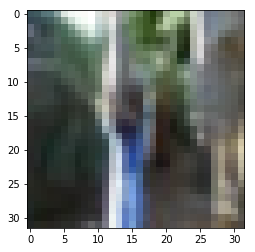

prediction: bird
true label: bird


Prediction: 1


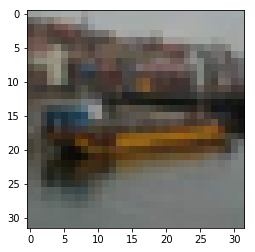

prediction: truck
true label: ship


Prediction: 2


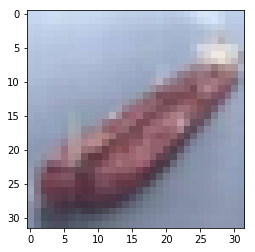

prediction: ship
true label: ship


Prediction: 3


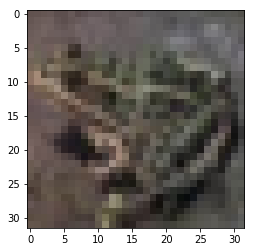

prediction: frog
true label: frog


Prediction: 4


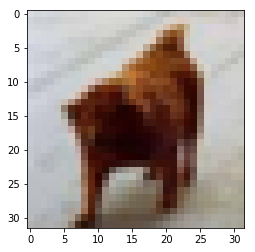

prediction: horse
true label: dog


Prediction: 5


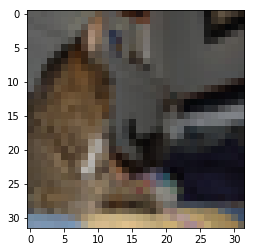

prediction: cat
true label: cat


Prediction: 6


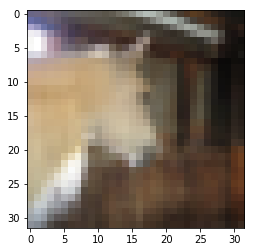

prediction: dog
true label: horse


Prediction: 7


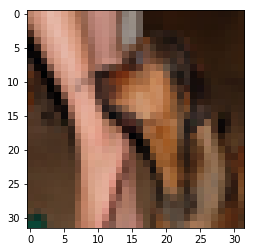

prediction: deer
true label: dog


Prediction: 8


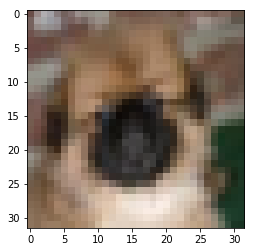

prediction: dog
true label: dog


Prediction: 9


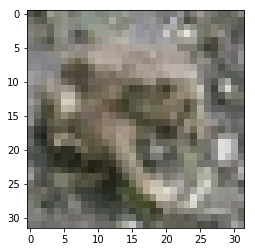

prediction: frog
true label: frog




In [2]:
"""
Model 1
layer: 4
batch normalization: X
learning epoch: 100
"""
print("<< model1 >>")
#show_model_arch(model1, "4layer_model.jpg")
model1.summary()
get_acc(model1, x_test, y_test) # accuracy 출력
pred(model1) # prediction 과정



<< model2 >>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496 

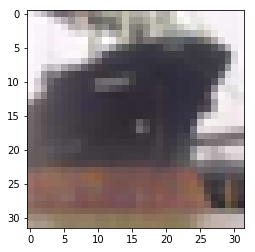

prediction: airplane
true label: ship


Prediction: 1


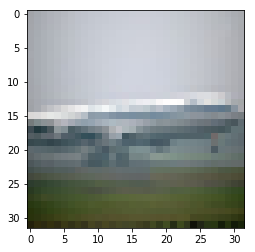

prediction: airplane
true label: airplane


Prediction: 2


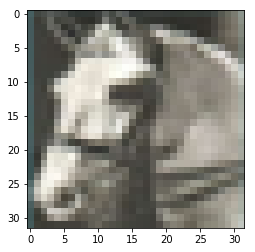

prediction: horse
true label: horse


Prediction: 3


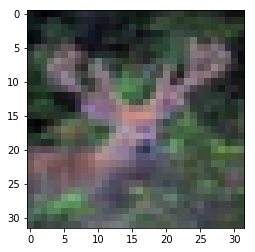

prediction: deer
true label: deer


Prediction: 4


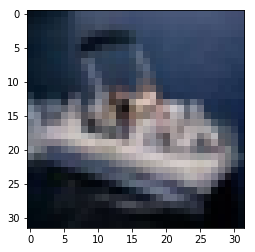

prediction: ship
true label: ship


Prediction: 5


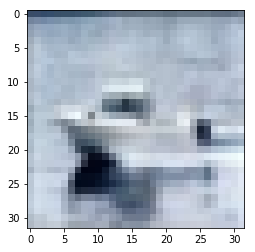

prediction: ship
true label: ship


Prediction: 6


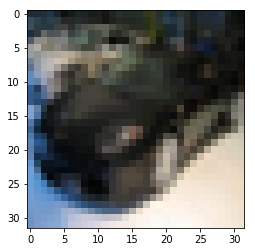

prediction: automobile
true label: automobile


Prediction: 7


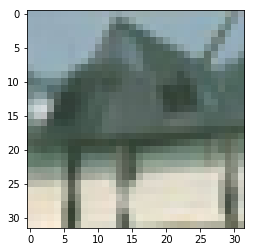

prediction: horse
true label: airplane


Prediction: 8


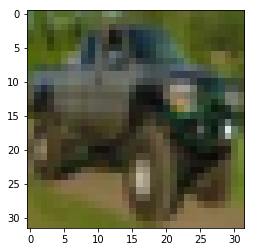

prediction: truck
true label: truck


Prediction: 9


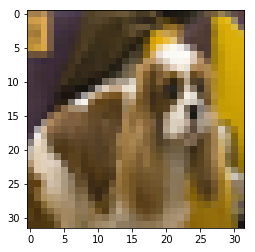

prediction: dog
true label: dog




In [3]:
"""
Model 2
layer: 6
batch normalization: X
learning epoch: 100
"""
print("\n\n<< model2 >>")
#show_model_arch(model2, "6layers_model.jpg")
model2.summary()
get_acc(model2, x_test, y_test) # accuracy 출력
pred(model2) # prediction 과정



<< model3 >>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0     

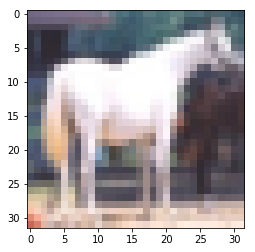

prediction: horse
true label: horse


Prediction: 1


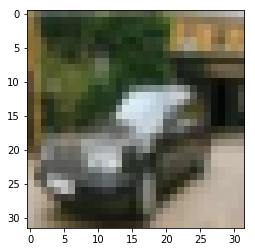

prediction: automobile
true label: automobile


Prediction: 2


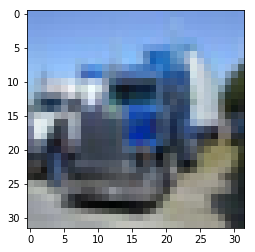

prediction: truck
true label: truck


Prediction: 3


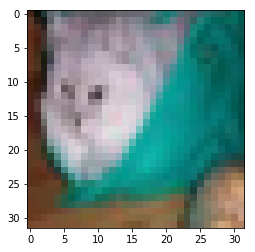

prediction: dog
true label: cat


Prediction: 4


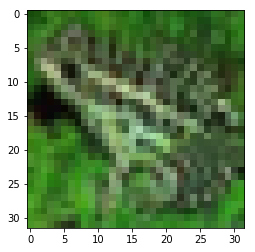

prediction: frog
true label: frog


Prediction: 5


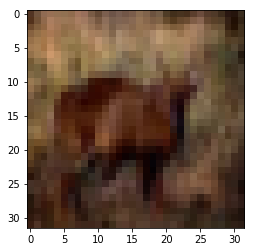

prediction: deer
true label: deer


Prediction: 6


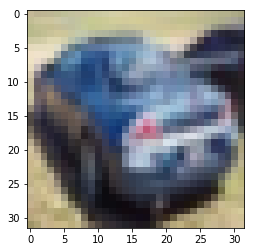

prediction: automobile
true label: automobile


Prediction: 7


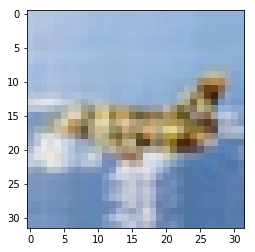

prediction: airplane
true label: airplane


Prediction: 8


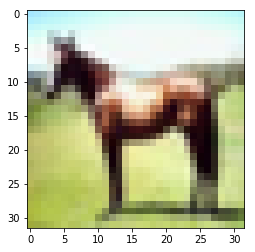

prediction: horse
true label: horse


Prediction: 9


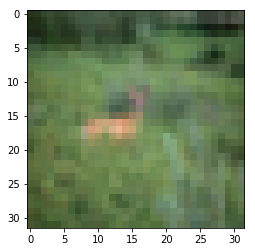

prediction: deer
true label: deer




In [4]:
"""
Model 3
layer: 6
batch normalization: O
learning epoch: 100
"""
print("\n\n<< model3 >>")
#show_model_arch(model2, "6layers_bn_model.jpg")
bn_model.summary()
get_acc(bn_model, x_test, y_test) # accuracy 출력
pred(bn_model) # prediction 과정

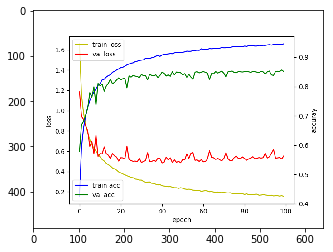

In [7]:
# 세번째 모델의 학습 히스토리 출력
from PIL import Image
im = Image.open('D:/PG_local/youngin/pt_2/cnn/6layers_bn_ep100.png')
plt.imshow(im)
plt.show()